<a href="https://colab.research.google.com/github/gayatri-2219/Sudoku-Solver/blob/main/pune_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project : Pune House Rent Price Predictor**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#kaggle data set link https://www.kaggle.com/datasets/anantsakhare/rental-price-of-indias-it-capital-pune-mh-ind
data = pd.read_csv("/content/test.csv")

In [ ]:
data = data[['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
             'floor_number', 'facing', 'parking' ,'deposit_amt', 'rent']]

In [ ]:
data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,parking,deposit_amt,rent
0,2,2,0.0,Semifurnished,All,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,No Direction,1,0,18500.0
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,1,63000,21000.0
2,2,2,900.0,Semifurnished,All,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,No Direction,1,25000,12000.0
3,3,3,1100.0,Furnished,Family Only,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,East,1,3,24000.0
4,1,1,605.0,Semifurnished,Family Only,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,East,1,3,13500.0


In [ ]:
data['address'].value_counts()

address
Paranjape Blue Ridge, Hinjewadi, , Pune, Maharashtra                          41
Xrbia Hinjewadi, Hinjewadi, , Pune, Maharashtra                               19
Rohan Abhilasha, Wagholi, , Pune, Maharashtra                                 17
Megapolis Sparklet, Hinjewadi, , Pune, Maharashtra                            17
Kolte Patil Life Republic, Hinjewadi, , Pune, Maharashtra                     15
                                                                              ..
Shree Manibhadra wakad Center, Bhausaheb Kalate Nagar, , Pune, Maharashtra     1
Matoshree Residency, Kondhwa, , Pune, Maharashtra                              1
Nanai Baug, Ganesh Nagar, , Pune, Maharashtra                                  1
Gajare Nivas., Thite Nagar, , Pune, Maharashtra                                1
Swapan Lok Society, Koregaon park, , Pune, Maharashtra                         1
Name: count, Length: 3694, dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:

data['deposit_amt'] = pd.to_numeric(data['deposit_amt'].astype(str).str.replace('[^\d.]', ''), errors='coerce')


In [ ]:

data['deposit_amt'].fillna(0, inplace=True)

In [ ]:
label_encoders = {}
categorical_columns = ['furnishing', 'avalable_for', 'address', 'facing']


In [ ]:
data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,parking,deposit_amt,rent
0,2,2,0.0,Semifurnished,All,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,No Direction,1,0,18500.0
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,1,63000,21000.0
2,2,2,900.0,Semifurnished,All,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,No Direction,1,25000,12000.0
3,3,3,1100.0,Furnished,Family Only,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,East,1,3,24000.0
4,1,1,605.0,Semifurnished,Family Only,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,East,1,3,13500.0


In [ ]:
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [ ]:
X = data.drop(columns=['rent'])
y = data['rent']


In [ ]:
data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,parking,deposit_amt,rent
0,2,2,0.0,1,0,366,1,1,1,0,18500.0
1,2,2,1050.0,1,0,1971,2,8,1,63000,21000.0
2,2,2,900.0,1,0,2824,6,1,1,25000,12000.0
3,3,3,1100.0,0,6,730,1,0,1,3,24000.0
4,1,1,605.0,1,6,204,4,0,1,3,13500.0


In [ ]:
value_counts = data['bedroom'].value_counts()
valid_classes = value_counts[value_counts >= 2].index
filtered_data = data[data['bedroom'].isin(valid_classes)]


In [ ]:
data.describe()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,parking,deposit_amt,rent
count,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5.343000e+03,5343.000000
mean,1.789257,1.775220,548.857251,1.721130,2.848025,1754.281864,3.081228,1.831555,0.878345,3.738546e+05,17067.275445
std,0.753962,0.777472,1113.614742,1.184614,2.899948,1027.360774,2.431801,2.481923,0.563943,2.462545e+07,10043.017880
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1600.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,895.000000,1.000000,0.000000,1.000000,4.000000e+00,10500.000000
50%,2.000000,2.000000,542.000000,1.000000,1.000000,1695.000000,2.000000,1.000000,1.000000,3.000000e+04,15000.000000
75%,2.000000,2.000000,840.000000,3.000000,6.000000,2604.500000,5.000000,2.000000,1.000000,5.000000e+04,20250.000000
max,8.000000,8.000000,53766.000000,3.000000,6.000000,3682.000000,9.000000,8.000000,7.000000,1.800050e+09,95000.000000


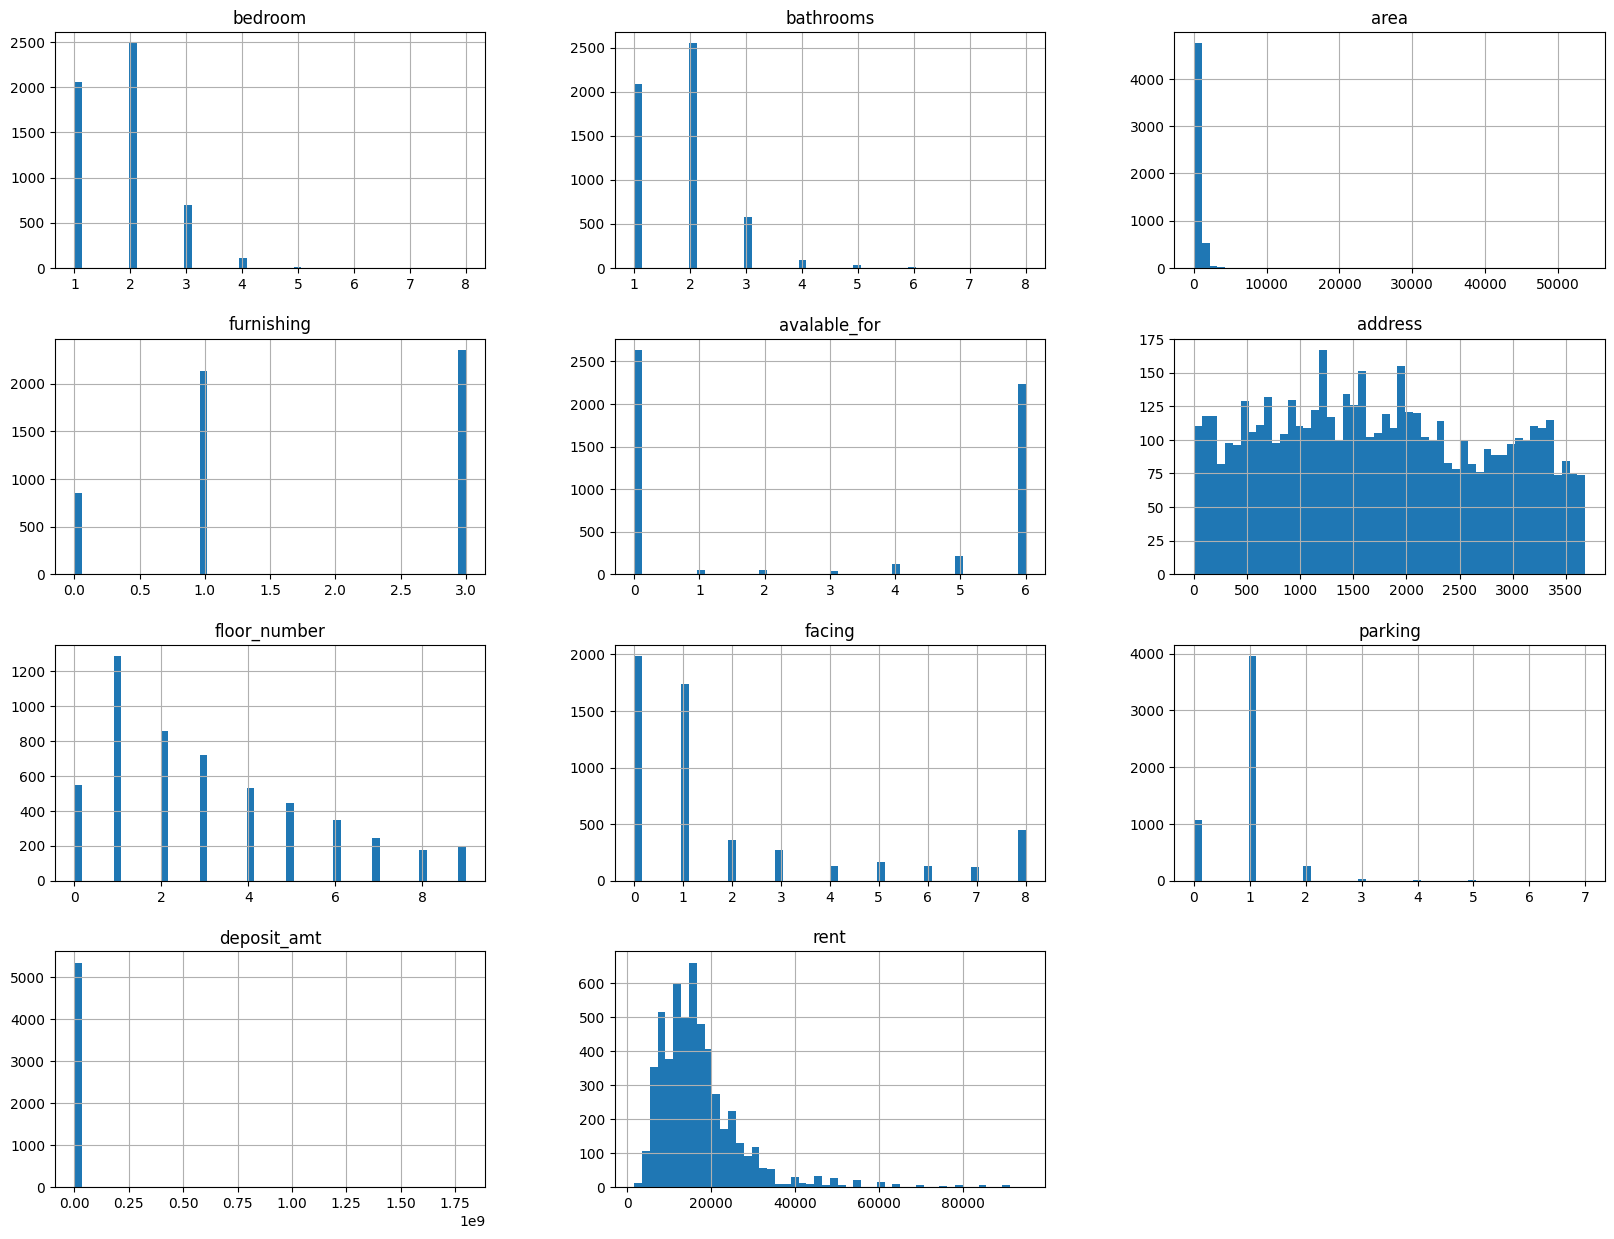

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
corr_matrix=data.corr()
corr_matrix['rent'].sort_values(ascending=False)

rent            1.000000
bedroom         0.689950
bathrooms       0.682571
parking         0.284626
area            0.170773
floor_number    0.154683
avalable_for    0.061510
deposit_amt     0.002277
address        -0.081179
facing         -0.085232
furnishing     -0.306214
Name: rent, dtype: float64

In [ ]:
X = filtered_data.drop(columns=['rent'])
y = filtered_data['rent']

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, filtered_data['bedroom']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [ ]:
scaler = StandardScaler()
X_train[['area', 'deposit_amt']] = scaler.fit_transform(X_train[['area', 'deposit_amt']])
X_test[['area', 'deposit_amt']] = scaler.transform(X_test[['area', 'deposit_amt']])


<ipython-input-29-94bd48aecabe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['area', 'deposit_amt']] = scaler.fit_transform(X_train[['area', 'deposit_amt']])
<ipython-input-29-94bd48aecabe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['area', 'deposit_amt']] = scaler.transform(X_test[['area', 'deposit_amt']])


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


RMSE: 7065.986593504357
R^2 Score: 0.49492810915413066


In [ ]:
def predict_rent(bedroom, bathrooms, area, furnishing, avalable_for, address, floor_number, facing, parking, deposit_amt):
    input_data = pd.DataFrame({
        'bedroom': [bedroom],
        'bathrooms': [bathrooms],
        'area': [area],
        'furnishing': [furnishing],
        'avalable_for': [avalable_for],
        'address': [address],
        'floor_number': [floor_number],
        'facing': [facing],
        'parking': [parking],
        'deposit_amt': [deposit_amt]
    })


    for column in categorical_columns:
        if column in input_data.columns:
            if input_data[column].iloc[0] not in label_encoders[column].classes_:
                input_data[column] = [0]
            else:
                input_data[column] = label_encoders[column].transform(input_data[column])


    input_data[['area',  'deposit_amt']] = scaler.transform(input_data[['area', 'deposit_amt']])


    rent_prediction = model.predict(input_data)
    return rent_prediction[0]


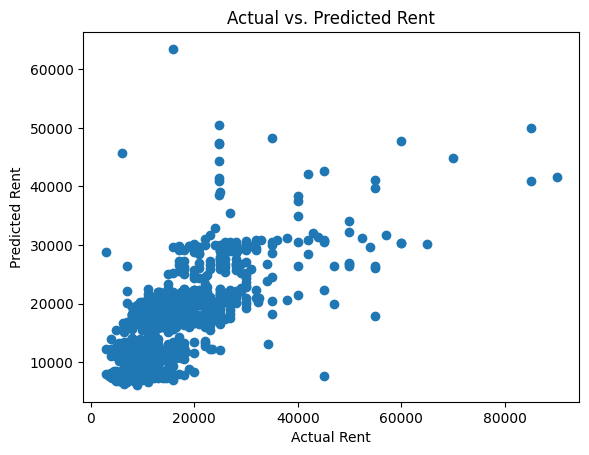

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs. Predicted Rent')
plt.show()

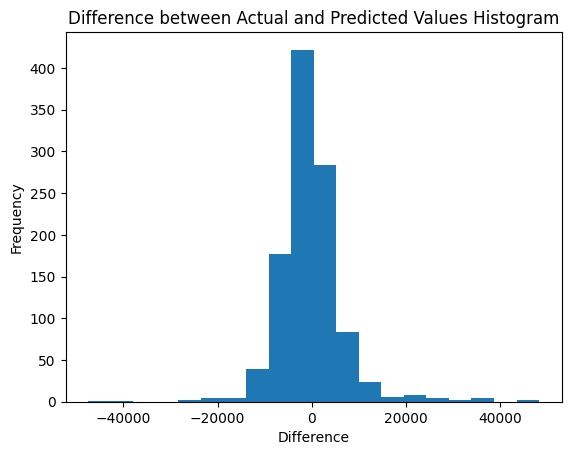

In [ ]:
diff = y_test - y_pred
plt.hist(diff, bins=20)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Difference between Actual and Predicted Values Histogram')
plt.show()


In [ ]:
predicted_rent = predict_rent(2, 2, 500, 'furnished', 'All', 'Simplicity Apartments, Handewadi, , Pune,', 1, 'East', 1, 50000)
print(f"Predicted Rent: Rs {predicted_rent}")

Predicted Rent: Rs 22501.010004459662


In [ ]:
predicted_rent = predict_rent(3, 2, 500, 'unfurnished', 'All', ' Hindewadi, , Pune,', 1, 'East', 1, 50000)
print(f"Predicted Rent: Rs {predicted_rent}")

Predicted Rent: Rs 27232.978520010416
